## Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df_train = pd.read_csv(f'train.csv')
df_test = pd.read_csv(f'test.csv')

In [3]:
dfc_train = df_train
dfc_test = df_test

In [4]:
y = dfc_train.Survived
dfc_train.drop(['Survived'], axis = 1, inplace = True) # Dropping extra column

In [5]:
dfc_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dfm = pd.concat([dfc_train, dfc_test], ignore_index=True)

In [7]:
dfm

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
dfm.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
dfm['Cabin'].fillna('N/A', inplace = True)

In [10]:
dfm['Embarked'].fillna((dfm['Embarked'].mode()[0]), inplace = True)

In [11]:
dfm['Age'].fillna((dfm['Age'].mode()[0]), inplace = True)

In [12]:
dfm['Fare'].fillna((dfm['Fare'].mean()), inplace = True)

In [53]:
column = 'Age'
dfm[column] = (dfm[column] - dfm[column].min()) / (dfm[column].max() - dfm[column].min())    
dfm

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,0.273456,1,0,A/5 21171,7.2500,N/A,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.473882,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,0.323563,0,0,STON/O2. 3101282,7.9250,N/A,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.436302,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,0.436302,0,0,373450,8.0500,N/A,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.298509,0,0,A.5. 3236,8.0500,N/A,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,0.486409,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,0.480145,0,0,SOTON/O.Q. 3101262,7.2500,N/A,S
1307,1308,3,"Ware, Mr. Frederick",male,0.298509,0,0,359309,8.0500,N/A,S


In [55]:
titan_df = dfm.copy()

In [56]:
titan_train = pd.concat([titan_df.sort_index().iloc[:891], y], axis = 1)
titan_train.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,0.336089,0,0,211536,13.00,N/A,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,0.235876,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.298509,1,2,W./C. 6607,23.45,N/A,S,0
889,890,1,"Behr, Mr. Karl Howell",male,0.323563,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,0.398722,0,0,370376,7.75,N/A,Q,0


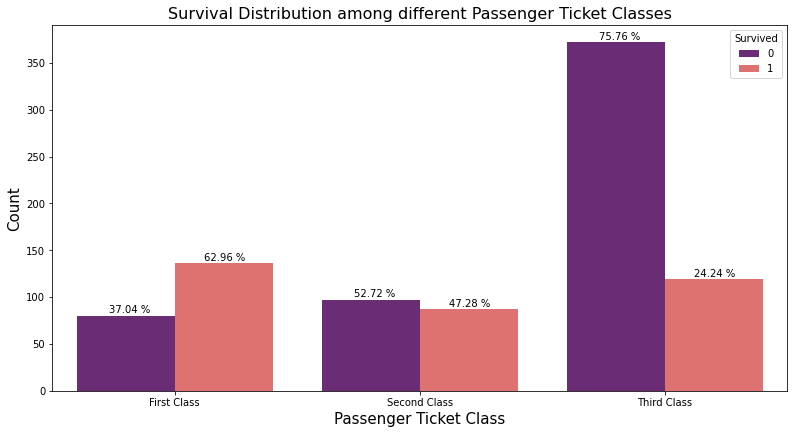

In [57]:
# Creating onject containing Ticket distribution
feature_pc = titan_train.groupby(by = 'Pclass')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_train, x = 'Pclass',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_pc[1][0] + 3, s = "{} %".format(((feature_pc[1][0]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_pc[1][1] + 3, s = "{} %".format(((feature_pc[1][1]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_pc[2][0] + 3, s = "{} %".format(((feature_pc[2][0]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_pc[2][1] + 3, s = "{} %".format(((feature_pc[2][1]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_pc[3][0] + 3, s = "{} %".format(((feature_pc[3][0]/feature_pc[3].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_pc[3][1] + 3, s = "{} %".format(((feature_pc[3][1]/feature_pc[3].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution among different Passenger Ticket Classes', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'], fontsize = 10)
plt.xlabel('Passenger Ticket Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# Show graph
plt.show()

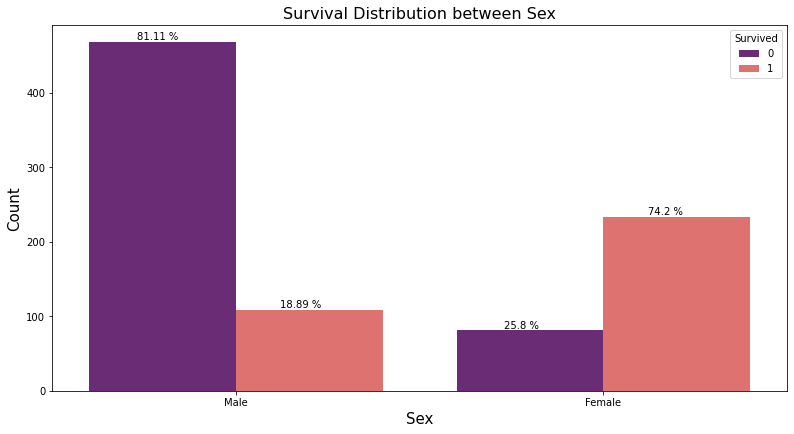

In [58]:
# Relationship between Survival and Sex 

# Creating onject containing Sex distribution
feature_sex = titan_train.groupby(by = 'Sex')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_train, x = 'Sex',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_sex['male'][0] + 3, s = "{} %".format(((feature_sex['male'][0]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_sex['male'][1] + 3, s = "{} %".format(((feature_sex['male'][1]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_sex['female'][0] + 3, s = "{} %".format(((feature_sex['female'][0]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_sex['female'][1] + 3, s = "{} %".format(((feature_sex['female'][1]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between Sex', fontsize = 16)

# Label Editing

plt.xticks([0, 1], ['Male', 'Female'], fontsize = 10)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# Show graph
plt.show()

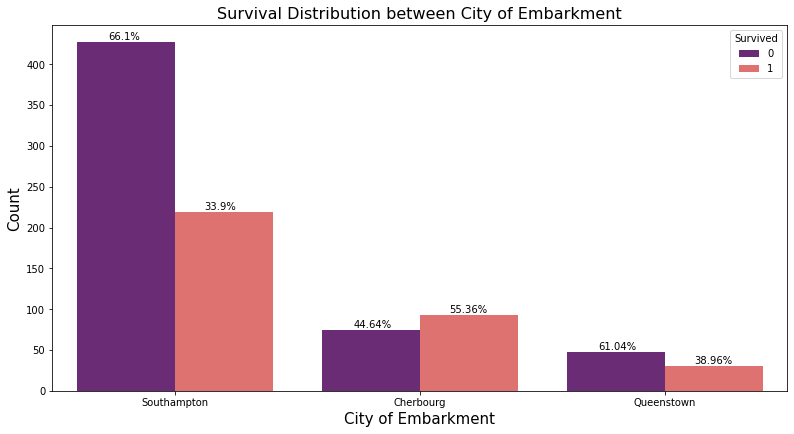

In [59]:
# Relationship between Survival and Embarked 

# Creating onject containing Embarked distribution
feature_embarked = titan_train.groupby(by = 'Embarked')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_train, x = 'Embarked',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_embarked['S'][0] + 3, s = "{}%".format(((feature_embarked['S'][0]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_embarked['S'][1] + 3, s = "{}%".format(((feature_embarked['S'][1]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_embarked['C'][0] + 3, s = "{}%".format(((feature_embarked['C'][0]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_embarked['C'][1] + 3, s = "{}%".format(((feature_embarked['C'][1]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_embarked['Q'][0] + 3, s = "{}%".format(((feature_embarked['Q'][0]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_embarked['Q'][1] + 3, s = "{}%".format(((feature_embarked['Q'][1]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between City of Embarkment', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize = 10)
plt.xlabel('City of Embarkment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# SHow graph
plt.show()

In [60]:
titan_df['Cabin'] = ['Present' if cabin != 'N/A' else 'Not Present' for cabin in titan_df.Cabin]

In [61]:
titan_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,0.273456,1,0,A/5 21171,7.2500,Not Present,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.473882,1,0,PC 17599,71.2833,Present,C
2,3,3,"Heikkinen, Miss. Laina",female,0.323563,0,0,STON/O2. 3101282,7.9250,Not Present,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.436302,1,0,113803,53.1000,Present,S
4,5,3,"Allen, Mr. William Henry",male,0.436302,0,0,373450,8.0500,Not Present,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.298509,0,0,A.5. 3236,8.0500,Not Present,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,0.486409,0,0,PC 17758,108.9000,Present,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,0.480145,0,0,SOTON/O.Q. 3101262,7.2500,Not Present,S
1307,1308,3,"Ware, Mr. Frederick",male,0.298509,0,0,359309,8.0500,Not Present,S
